In [30]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import ConfigReader as cr

In [31]:
#Styles
sns.set_style('darkgrid')
sns.set_color_codes()
plt.rcParams['figure.figsize'] = (12.0, 9.0)

plt.rc('text', usetex=False)
plt.rc('font', size=20.0, family='serif')

In [32]:
# Data location and dataset
data_dir = '/mhome/mendozah/constrained_DeepNet_Configs/policy_results/'
scenario = '554_bac'

In [46]:
reader = cr.ConfigReader()

In [49]:
tdf = reader.load_run_configs(data_dir=data_dir, dataset=scenario, preprocessor=None)

paramstrings-SHUTDOWN62*
paramstrings-SHUTDOWN39*
paramstrings-SHUTDOWN68*
paramstrings-SHUTDOWN55*
paramstrings-SHUTDOWN37*
paramstrings-SHUTDOWN30*
paramstrings-SHUTDOWN74*
paramstrings-SHUTDOWN83*
paramstrings-SHUTDOWN68*
paramstrings-SHUTDOWN97*


ConfigReader.py:124: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  config_df = _pd.read_csv(confname, delimiter=",|:\s", header=None)


In [52]:
tdf.shape

(706, 40)

In [55]:
# Plot the empirical CDF
sorted_Y = (tdf.sort_values(by='response', ascending=True)['response'].values)
yvals = np.arange(len(sorted_Y)) / float(len(sorted_Y))

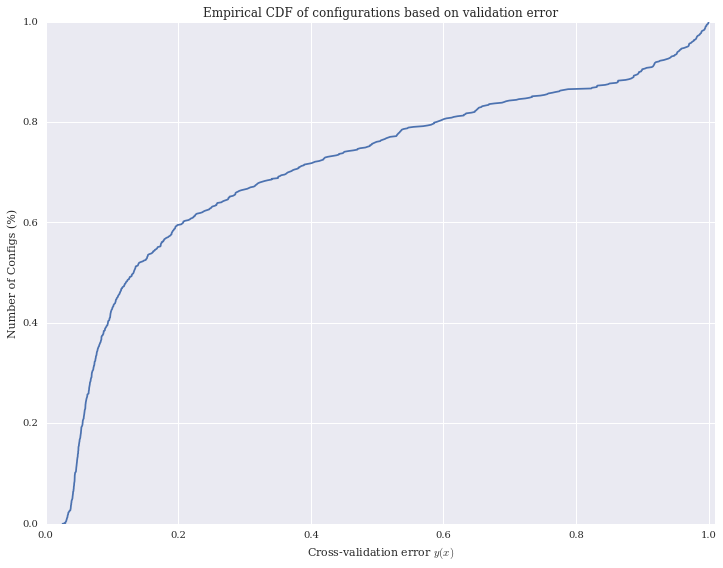

In [57]:
plt.plot( sorted_Y, yvals )
plt.xlabel("Cross-validation error $y(x)$")
plt.ylabel(r"Number of Configs (%)")
plt.xlim(0.0, 1.01)
plt.title("Empirical CDF of configurations based on validation error")
plt.show()

In [58]:
trainset_size = 42210
tdf['epochs'] = np.floor((tdf.batch_size * tdf.number_updates)/ trainset_size)

In [59]:
tdf.sort_values(by='response').head()

,config_id,response,runtime,smac_iter,cum_runtime,run_result,batch_size,beta1,beta2,dropout_layer_1,...,rho,solver,std_layer_1,std_layer_2,choice,minimum_fraction,use_minimum_fraction,choice,choice,epochs
422,133,0.025550,505.637000,67,71422.277258,SAT,530,0.000987,0.029974,0.106631,...,0.661496,nesterov,0.000002,0.000015,DeepFeedNet,0.012170,False,NoPreprocessing,none,3
512,96,0.029794,286.378739,49,52545.503755,SAT,514,0.001524,0.001059,0.239903,...,0.821173,adadelta,0.000071,0.001583,DeepFeedNet,0.002238,False,NoPreprocessing,none,4
705,117,0.029800,181.638546,59,53114.421459,SAT,639,0.001040,0.016099,0.471872,...,0.205053,adagrad,0.000047,0.000436,DeepFeedNet,0.003368,True,NoPreprocessing,standardize,4
511,155,0.030518,240.937271,79,75964.722929,SAT,111,0.001524,0.001059,0.239903,...,0.821173,adadelta,0.000052,0.001583,DeepFeedNet,0.002238,False,NoPreprocessing,none,1
421,147,0.031169,604.851672,74,83430.995301,SAT,799,0.000987,0.029974,0.176890,...,0.661496,momentum,0.000001,0.000015,DeepFeedNet,0.012170,False,NoPreprocessing,none,5


In [63]:
tdf.epochs.values.astype(int)

array([ 1,  1,  1,  6,  1,  4,  1,  1,  0,  0,  1,  3,  1,  5,  1,  2,  1,
        1,  3,  0,  2,  3,  0,  0,  2,  1,  1,  1,  1,  2,  2,  2,  1,  1,
        2,  4,  1,  3,  2,  1,  0,  1,  1,  1,  1,  1,  1,  1,  5,  4,  1,
        8,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  3,  4,  0,  1,  0,  1,  1,  0,  1,  1,  4,  0,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  3,  1,  1,  4,  2,  2,  2,  2,  2,  4,  2,  4,  1,  5,  1,
        4,  1,  7,  7,  5,  3,  0,  2,  6,  7,  2,  2,  2,  2,  5,  2,  1,
        0,  2,  3,  2,  0,  3,  5,  1,  1,  2,  3,  2,  2,  1,  6,  2,  1,
        2,  7,  1,  1,  1,  4,  2,  4,  1,  2,  1,  6,  6,  2,  0,  0,  6,
        6,  0,  0,  8,  2,  3,  1,  2,  5,  0,  5,  0,  4,  5,  0,  1,  1,
        1,  2,  0,  0,  0,  1,  1,  0,  0,  0,  0,  3,  0,  0,  0,  4,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  0,  0,  1,  0